In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.random.uniform(-1, 1, size=(1000, 2))

labels = np.where(
    x[:, 0] > x[:, 1],
    0,
    np.where(
        (x[:, 0] < x[:, 1]) & (-x[:, 0] > x[:, 1]),
        1,
        2
    )
)

y = np.zeros((labels.shape[0], labels.max() + 1))
y[np.arange(labels.shape[0]), labels] = 1

In [3]:
labels[:10]

array([1, 2, 0, 1, 2, 0, 0, 1, 0, 2])

In [4]:
y[:10]

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

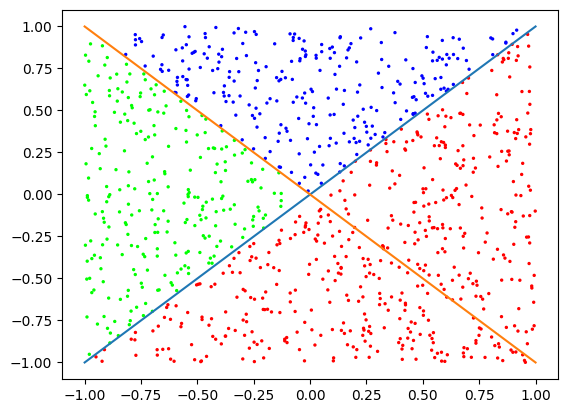

In [5]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=2)
plt.plot(np.linspace(-1, 1, 1000), np.linspace(-1,1,1000))
plt.plot(np.linspace(-1, 1, 1000), -np.linspace(-1,1,1000))
plt.show()

In [6]:
z = np.array([[9, 2, 1], [3, 4, 0]])

# вариант 1
# def softmax(z):
#     return np.exp(z) / np.exp(z).sum(axis=0)

# print(np.apply_along_axis(softmax, axis=1, z))

# вариант 2
from scipy.special import softmax
print(softmax(z, axis=1))

[[9.98754209e-01 9.10745952e-04 3.35044712e-04]
 [2.65387929e-01 7.21399184e-01 1.32128870e-02]]


In [7]:
def grad(x, y, theta):
    l = len(x)
    yhat = np.dot(x, theta)
    return (-1/l) * np.dot(np.transpose(x), y - softmax(yhat, axis=1))

In [8]:
def grad_descent(x, y, n = 1000, eta = 0.1, tol = 0.00001):
    x = np.c_[x,np.ones(x.shape[0])]
    theta_init = np.zeros((x.shape[1], y.shape[1]))
    theta_cur = theta_init + 100
    for i in range(n):
        theta_cur = theta_init - eta * grad(x, y, theta_init)
        if np.linalg.norm(theta_cur - theta_init) < tol:
            return theta_init
        else:
            theta_init = theta_cur
    return theta_init

In [9]:
theta = grad_descent(x,y, n=10000, eta=2)

In [10]:
theta

array([[ 27.74658566, -17.4374164 , -10.30916925],
       [-27.19742119,  10.39232813,  16.80509306],
       [  2.2148817 ,  -1.29511535,  -0.91976636]])

In [11]:
y_new = np.argmax(softmax(np.dot(np.c_[x,np.ones(x.shape[0])], theta), axis=1), axis=1)

In [14]:
# y_new

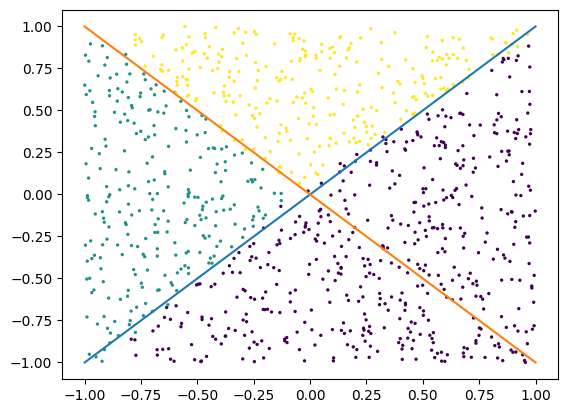

In [12]:
plt.scatter(x[:, 0], x[:, 1], c=y_new, s=2)
plt.plot(np.linspace(-1, 1, 1000), np.linspace(-1,1,1000))
plt.plot(np.linspace(-1, 1, 1000), -np.linspace(-1,1,1000))
plt.show()